# **Modelagem de dados - Parkinson**

**Criador:** Bruno Villa Ribeiro

**Situação do criador:** Estágiario no time de DS da SAS e cursando Matemática no IME-USP.

**Data de criação**: 25/09/2020

**Descrição da base de dados:** Esta base de dados é o estudo do comportamento da voz de 42 pessoas com início da doença de Parkinson ao longo de seis meses. Este estudo foi feito por Athanasios Tsanas e Max Little da Universidade de Oxford com a ajuda de 11 pessoas da área da saúde. A métrica utilizada para classificar o estado mental da pessoa é o questionário Escala Unificada de Avaliação da DP(UPDRS). Este questionário é dividido em 44 seções onde as 18 primeiras seções são perguntas sobre o estado mental do paciente(insônia, ansiedade) e as demais são sobre hábitos diários (higiene, passatempos).

Temos as seguintes colunas em nosso dataset:

- Subject#: Número do participante do estudo(primary key).

- age: Idade do participante.

- sex: Sexo do participante. O número ‘0’ representa participantes do sexo masculino e o número '1' represente o participante do sexo feminino.

- test_time: A parte inteira desta coluna representa número de dias após o inicio do estudo.

- UPDRS: É uma escala clínica para registrar os sintomas relacionados à doença de Parkinson. A métrica UPDRS consiste em 44 seções, onde cada seção aborda diferentes sintomas em diferentes partes do corpo. A soma da pontuação dessas 44 seções dá pontua o total do UPDRS, que abrange o intervalo de 0-176, com 0 representando um indivíduo  saudável e 176 um indivíduo com incapacidade total.

- Motor UPDRS - Soma dos pontos das seções 18 a 44 da métrica UPDRS.

- Total_UPDRS - Soma dos pontos das 44 seções da métrica UPDRS.

- Jitter Percentage - Porcentagem do parâmetro acústico de variabilidade da frequência fundamental a curto prazo, medida entre ciclos glóticos.

- Jitter (Absolute) - O mesmo parâmetro do 'Jitter Percentage' porém em segundos.

- Jitter (RAP) - média relativa da perturbação, isto é, a diferença média absoluta de um período e a média desse período com os seus dois vizinhos, dividido pelo período médio.

- Jitter (PPQ5) - Representa o quociente de perturbação num período de cinco pontos, ou seja, a diferença média absoluta entre um período e a média desse mesmo período com os seus quatro vizinhos.

- Jitter (DDP) - Esta é a diferença média absoluta entre diferenças consecutivas entre períodos consecutivos, dividida pelo período médio.

- Shimmer - É variabilidade da amplitude da onda sonora, isto é, representa as alterações irregulares na amplitude dos ciclos glóticos, de um ciclo a outro. Também medido em porcentagem.

- Shimmer(dB)-  Representa a diferença média absoluta do logaritmo de base 10 da diferença entre dois períodos consecutivos e chama-se a este parâmetro SHDB.

- Shimmer:APQ3- Representa o quociente de perturbação da amplitude de três pontos, ou seja, a diferença média absoluta entre a amplitude de um período e a média de amplitudes dos seus dois vizinhos, dividido pela amplitude média.

- Shimmer:APQ5- Representa o quociente de perturbação da amplitude de cinco pontos, ou seja, a diferença média absoluta entre a amplitude de um período e a média das amplitudes dele e dos seus quatro vizinhos mais próximos, dividido pela amplitude média.

- Shimmer:APQ11- Representa o Quociente de Perturbação de Amplitude de 11 pontos, a diferença absoluta média entre a amplitude de um período e a média das amplitudes dele e de seus dez vizinhos mais próximos, dividida pela amplitude média.

- Shimmer:DDA-  Esta é a diferença média absoluta entre amplitudes consecutivas e as amplitudes dos períodos consecutivos.

- NHR:Proporção ruído-harmônico.

- HNR: Grau de periodicidade acústica

- RPDE - Metodo estatistico para calcular a peridiocidade e repetição de voz.

- DFA - É um método para determinar a autoafinidade estatística de um sinal.

- PPE - Pitch Period Entropy é a dificuldade de prever uma determinada variável X.

**Objetivo:** Descrobrir se existe uma correlação entre as vozes e a pontuação do UPDRS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as matplot
import time
import datetime
import statsmodels
import pylab as plot

In [2]:
data = pd.read_table('parkinsons_updrs.data', sep = ',', header=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [4]:
#Visualizar todas as colunas do dataset.
pd.set_option('display.max_columns', 50)

In [5]:
data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [6]:
data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [7]:
data.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

- Não tenho dados Null.

In [8]:
data.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

- Colunas presentes no dataset.

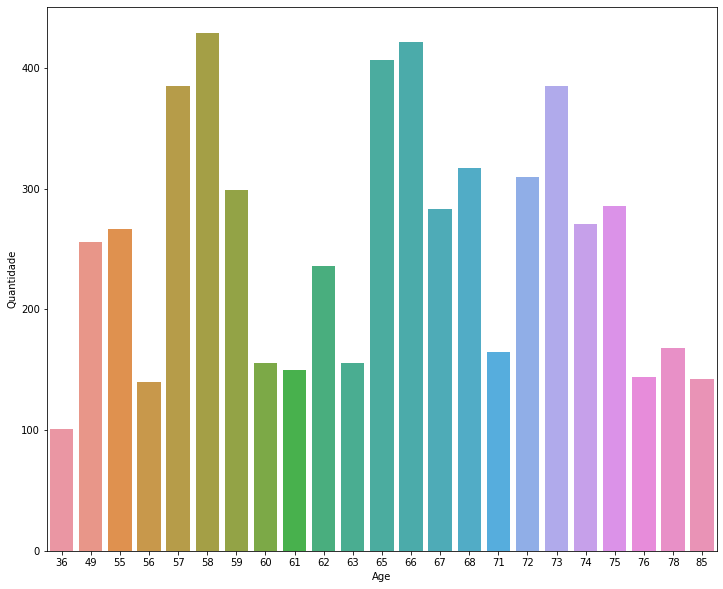

In [9]:
Data_count  = data['age'].value_counts()
plt.figure(figsize=(12,10))
plt.ylabel('Quantidade')
plt.xlabel('Age')
fig=sns.barplot(Data_count.index, Data_count.values).get_figure()

In [10]:
data['age'].value_counts(normalize=True) * 100

58    7.302128
66    7.182979
65    6.927660
57    6.553191
73    6.553191
68    5.395745
72    5.276596
59    5.089362
75    4.868085
67    4.817021
74    4.612766
55    4.544681
49    4.357447
62    4.017021
78    2.859574
71    2.808511
60    2.655319
63    2.655319
61    2.553191
76    2.451064
85    2.417021
56    2.382979
36    1.719149
Name: age, dtype: float64

- Visualizando quais são as idades presentes no dataset

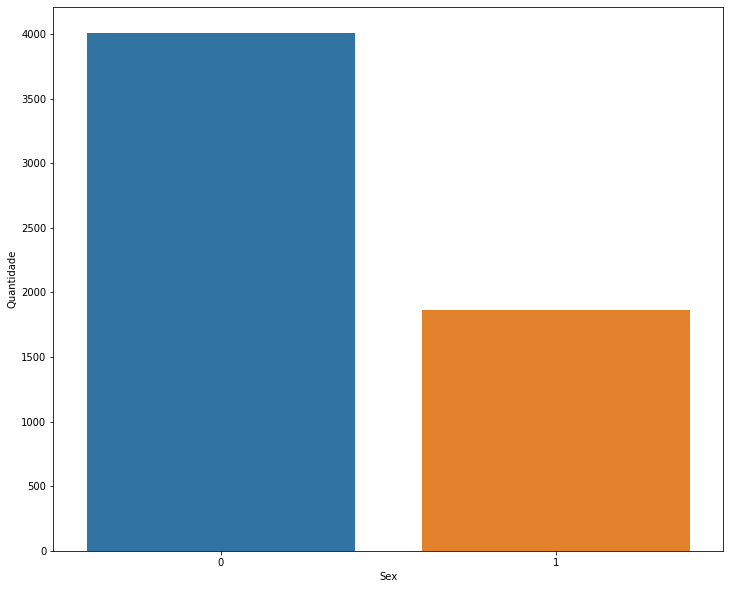

In [11]:
Data_count  = data['sex'].value_counts()
plt.figure(figsize=(12,10))
plt.ylabel('Quantidade')
plt.xlabel('Sex')
fig=sns.barplot(Data_count.index, Data_count.values).get_figure()

In [12]:
dupla = data.drop_duplicates(subset = 'subject#', keep ='first')

In [13]:
dupla

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.64310,28.1990,34.3980,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
149,2,58,0,3.86600,11.0780,14.0390,0.00600,0.000048,0.00302,0.00294,0.00907,0.03866,0.331,0.02058,0.02464,0.02778,0.06175,0.019901,20.632,0.54100,0.75905,0.192880
294,3,57,0,7.28820,23.4370,25.7290,0.00565,0.000031,0.00321,0.00325,0.00963,0.02518,0.246,0.01442,0.01341,0.01500,0.04326,0.029994,24.756,0.34321,0.56409,0.167910
438,4,74,0,9.68680,10.7370,15.2630,0.00410,0.000034,0.00163,0.00235,0.00488,0.03048,0.273,0.01378,0.01821,0.03138,0.04134,0.021982,20.493,0.70390,0.57545,0.188370
575,5,75,0,58.57900,31.0000,40.9100,0.00601,0.000057,0.00261,0.00335,0.00782,0.03827,0.336,0.02123,0.02405,0.02780,0.06369,0.037903,16.656,0.57854,0.67408,0.264630
731,6,63,0,5.34100,27.8830,39.0590,0.00961,0.000070,0.00549,0.00504,0.01647,0.04391,0.385,0.02545,0.02375,0.03089,0.07636,0.083288,15.320,0.65252,0.66396,0.260050
887,7,72,0,51.58700,16.6640,24.1090,0.01638,0.000168,0.00909,0.00726,0.02726,0.03555,0.289,0.01502,0.02084,0.03401,0.04507,0.088541,15.585,0.75155,0.68253,0.481560
1048,8,73,1,8.59510,18.0930,24.0930,0.00508,0.000027,0.00268,0.00279,0.00805,0.04755,0.424,0.02559,0.02831,0.03348,0.07678,0.025365,19.363,0.64008,0.70365,0.208030
1198,9,68,0,4.43330,17.0000,23.0960,0.00821,0.000078,0.00395,0.00479,0.01186,0.03119,0.310,0.01388,0.01709,0.02775,0.04163,0.028974,19.347,0.69439,0.75761,0.325040
1350,10,58,0,10.30300,12.0000,19.0000,0.00457,0.000041,0.00125,0.00206,0.00376,0.01879,0.168,0.00704,0.01018,0.01999,0.02112,0.014300,22.973,0.59941,0.63776,0.193570


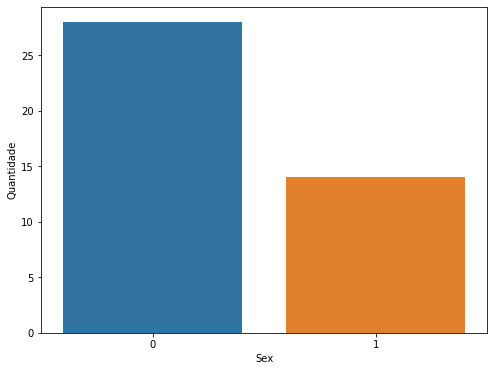

In [14]:
Data_count  = dupla['sex'].value_counts()
plt.figure(figsize=(8,6))
plt.ylabel('Quantidade')
plt.xlabel('Sex')
fig=sns.barplot(Data_count.index, Data_count.values).get_figure()

In [15]:
dupla.groupby('sex').age.agg(['count','min','max','mean'])

,count,min,max,mean
sex,,,,
0,28,49,78,64.821429
1,14,36,85,63.571429


In [16]:
data['sex'].value_counts(normalize=True) * 100

0    68.221277
1    31.778723
Name: sex, dtype: float64

- 66,7% deste dataset é do sexo masculino enquanto 33,3% do sexo feminino.

In [17]:
data.groupby('sex').age.agg(['count','min','max','mean'])

,count,min,max,mean
sex,,,,
0,4008,49,78,65.055389
1,1867,36,85,64.267274


- A media de idade para  o sexo feminino é de 64 anos e do sexo masculino é de 65 anos.

In [18]:
data.groupby('sex').agg(['mean'])

,subject#,age,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
sex,,,,,,,,,,,,,,,,,,,,,
0,19.072106,65.055389,93.221349,21.469349,29.724055,0.005956,0.000048,0.002824,0.003053,0.008471,0.033000,0.302085,0.016750,0.019407,0.027162,0.050249,0.025269,21.679985,0.552449,0.661229,0.225827
1,26.693626,64.267274,92.095983,20.924581,27.505234,0.006577,0.000036,0.003338,0.003758,0.010015,0.036258,0.330013,0.018027,0.021727,0.028165,0.054081,0.046827,21.678445,0.517910,0.636088,0.206197


 - Homens tem uma maior variabilidade acustica.
 - A variação de amplitute sonora é de mulheres.

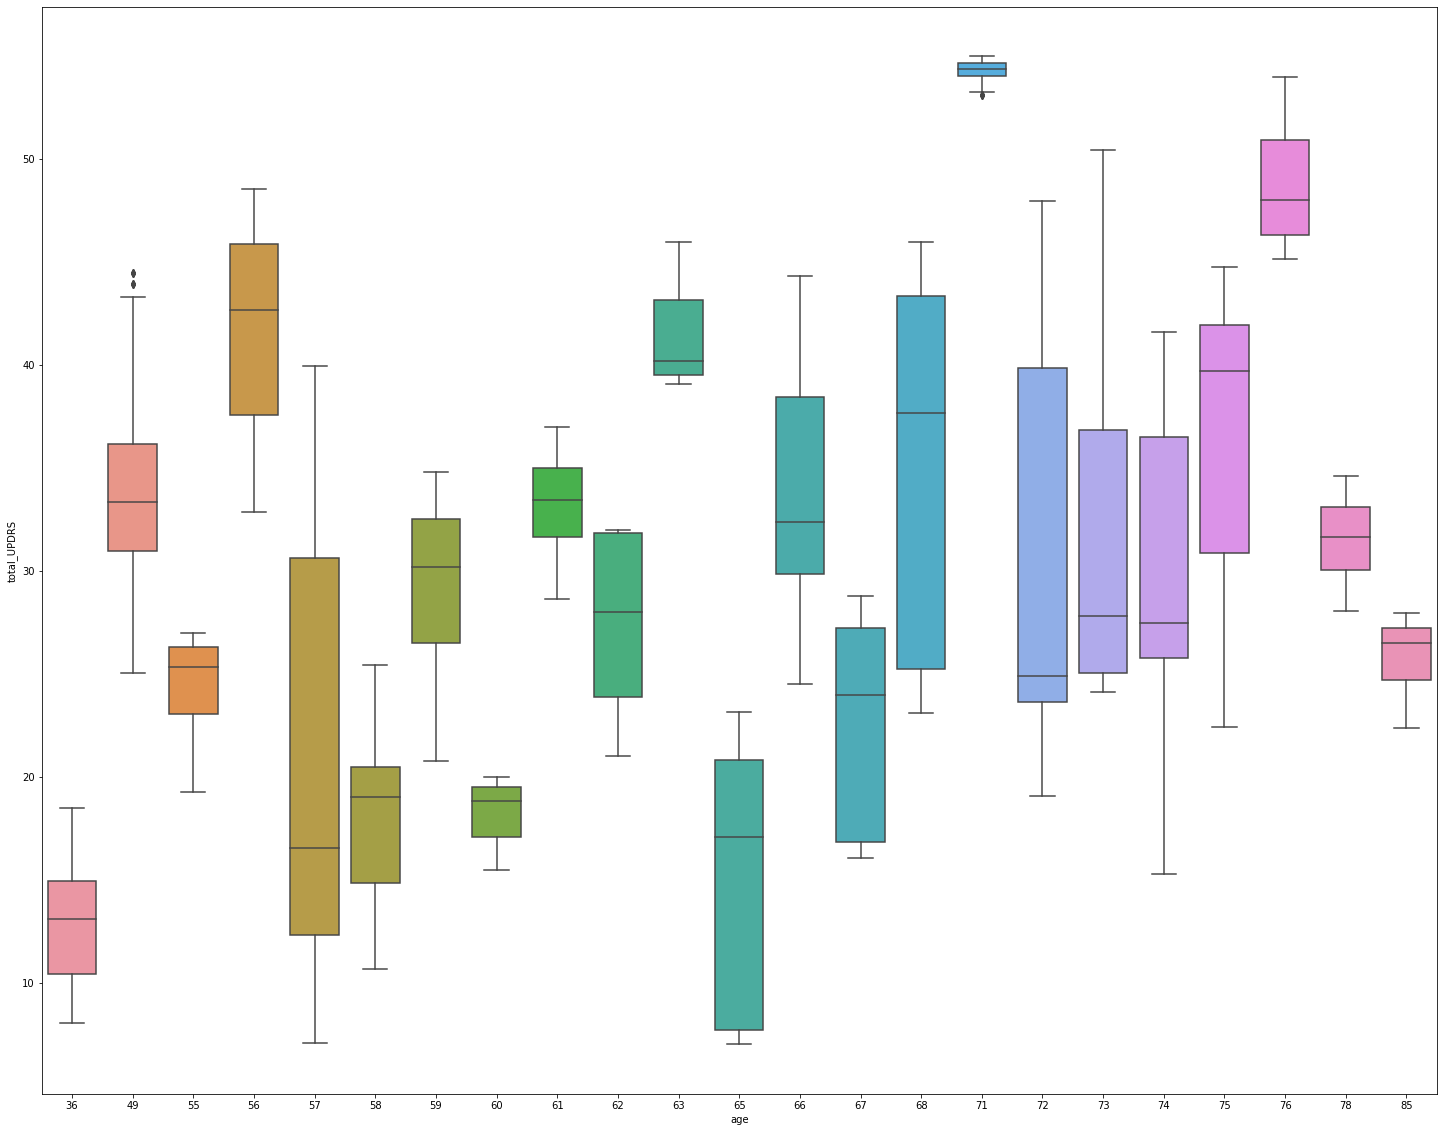

In [19]:
plt.figure(figsize=(25,20))
sns.boxplot(data=data, y='total_UPDRS' ,x = 'age')

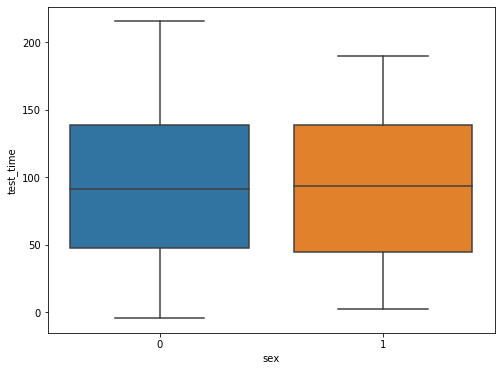

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, y='test_time' ,x = 'sex')

- O tempo de teste foi igual para ambos os sexos.

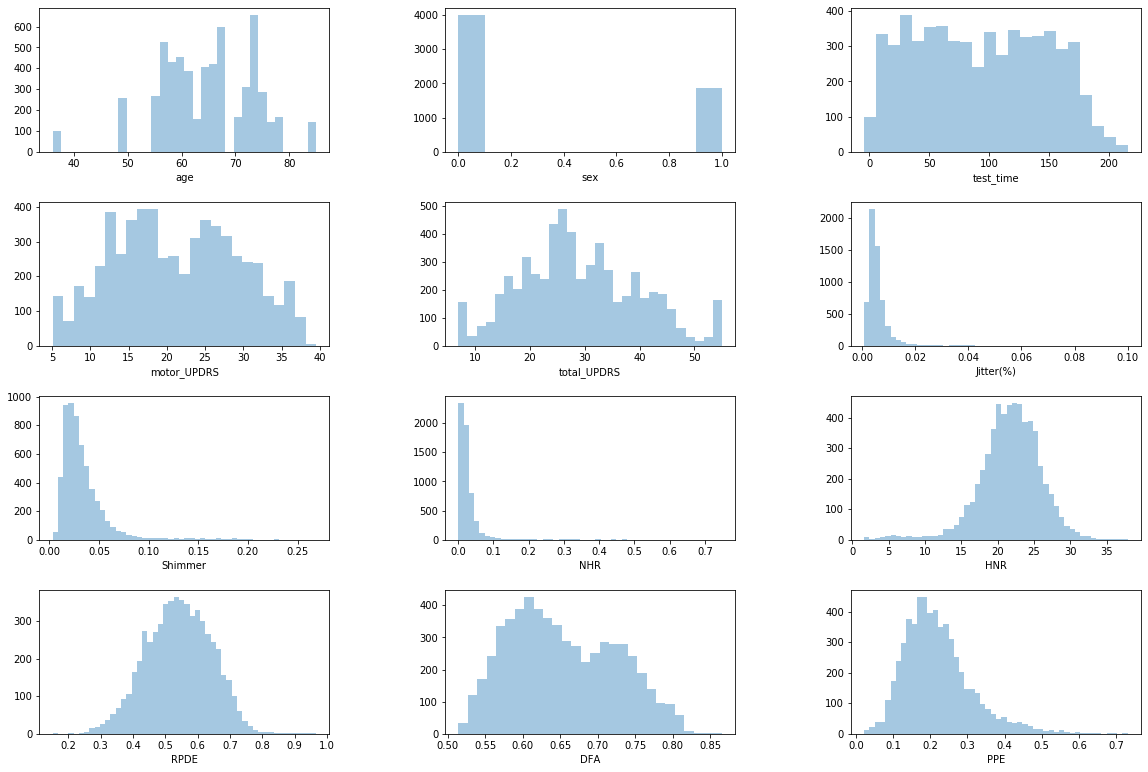

In [21]:
lista_numerica_valores = ['age',              
'sex',              
'test_time',        
'motor_UPDRS',     
'total_UPDRS',      
'Jitter(%)',        
'Shimmer',            
'NHR',              
'HNR' ,             
'RPDE',             
'DFA'  ,            
'PPE']

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
for col, ax in zip(lista_numerica_valores[0:], axs.ravel()):
    x=data.loc[:,col]
    sns.distplot(x, ax=ax, kde = False, hist = True)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

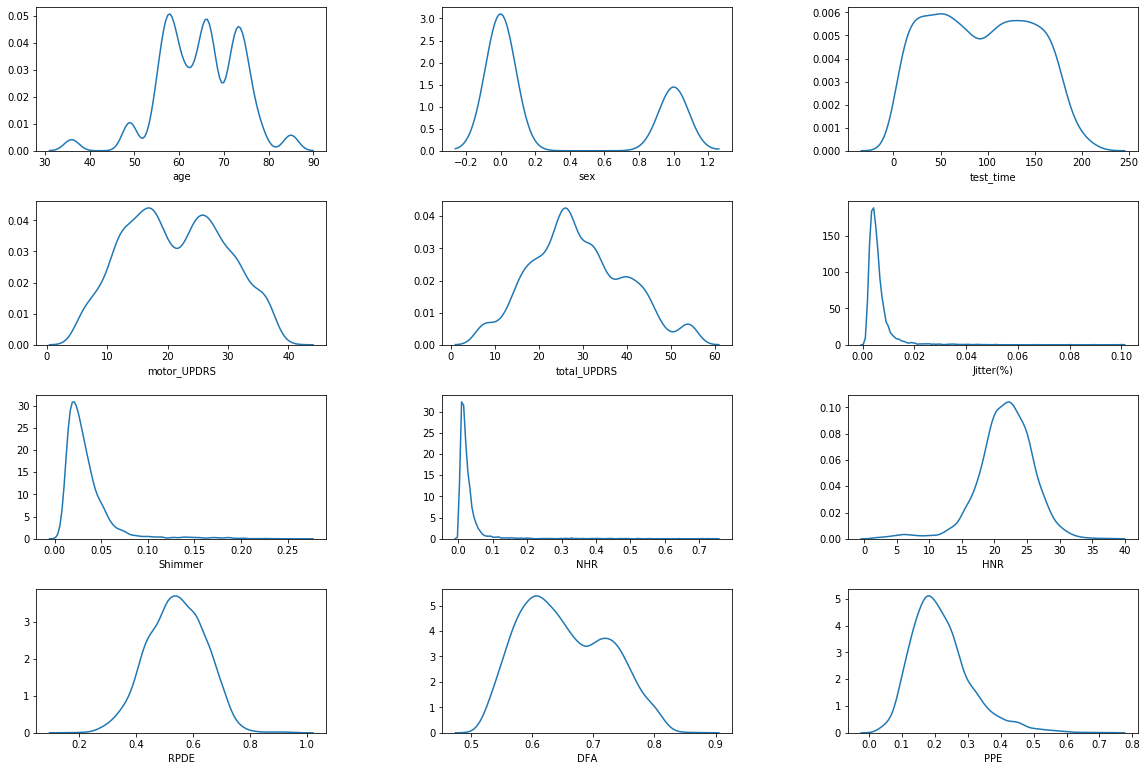

In [22]:
lista_numerica_valores = ['age',              
'sex',              
'test_time',        
'motor_UPDRS',     
'total_UPDRS',      
'Jitter(%)',        
'Shimmer',            
'NHR',              
'HNR' ,             
'RPDE',             
'DFA'  ,            
'PPE']

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
for col, ax in zip(lista_numerica_valores[0:], axs.ravel()):
    x=data.loc[:,col]
    sns.distplot(x, ax=ax, kde = True, hist = False)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

 - Tenho uma distribuição normal dos dados nas colunas de ' RPDE','PPE' e 'HNR'.
 - 'Shimmer', 'NHR', 'Jitter%' são dados que provavelmente irei normalizar pro modelo.

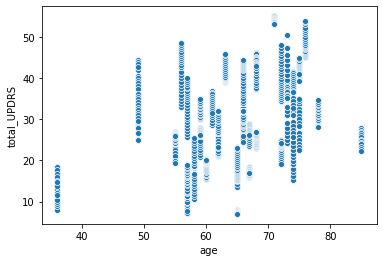

In [23]:
sns.scatterplot(data = data, x="age", y="total_UPDRS")

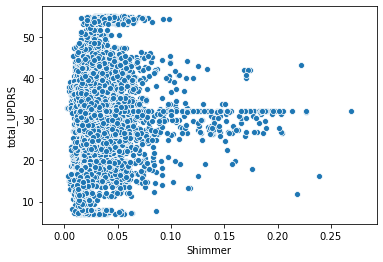

In [24]:
sns.scatterplot(data = data, x="Shimmer", y="total_UPDRS")

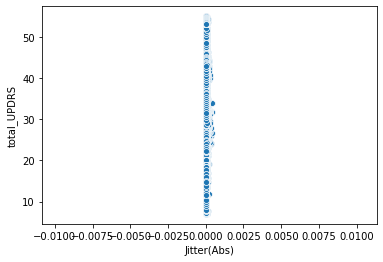

In [25]:
sns.scatterplot(data = data, x="Jitter(Abs)", y="total_UPDRS")

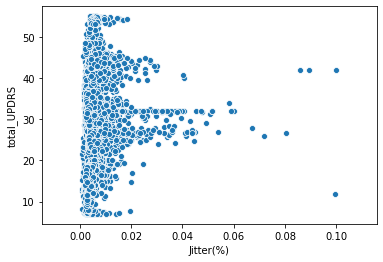

In [26]:
sns.scatterplot(data = data, x="Jitter(%)", y="total_UPDRS")

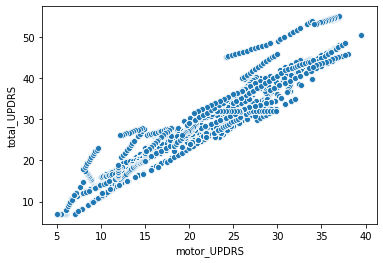

In [27]:
sns.scatterplot(data = data, x="motor_UPDRS", y="total_UPDRS")

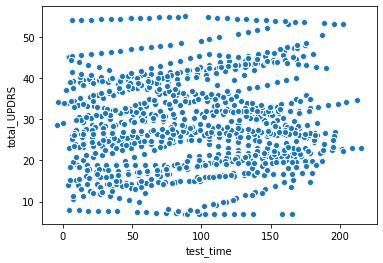

In [28]:
sns.scatterplot(data = data, x="test_time", y="total_UPDRS")

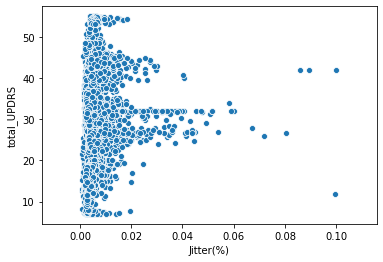

In [29]:
sns.scatterplot(data = data, x="Jitter(%)", y="total_UPDRS")

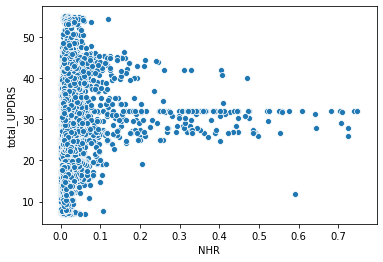

In [30]:
sns.scatterplot(data = data, x="NHR", y="total_UPDRS")

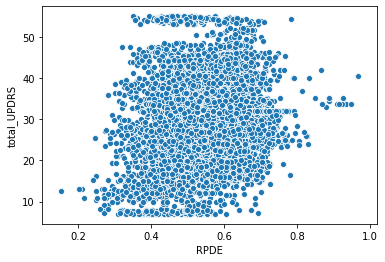

In [31]:
sns.scatterplot(data = data, x="RPDE", y="total_UPDRS")

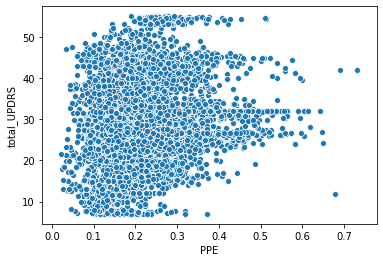

In [32]:
sns.scatterplot(data = data, x="PPE", y="total_UPDRS")

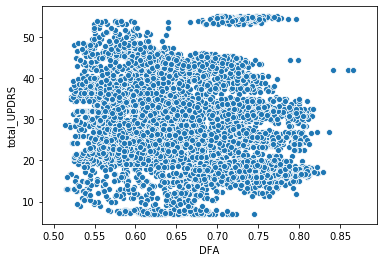

In [33]:
sns.scatterplot(data = data, x="DFA", y="total_UPDRS")

- Temos vários outliers nessas últimas quatro metrícas.

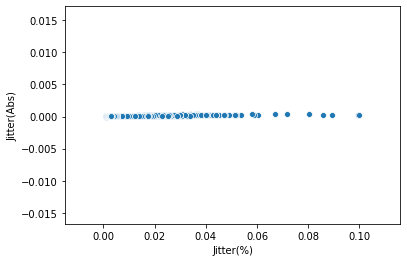

In [40]:
sns.scatterplot(data = data, x="Jitter(%)", y="Jitter(Abs)")

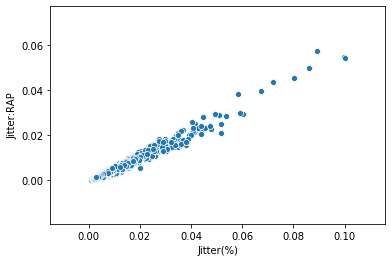

In [41]:
sns.scatterplot(data = data, x="Jitter(%)", y="Jitter:RAP")

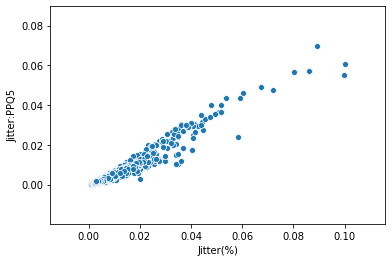

In [42]:
sns.scatterplot(data = data, x="Jitter(%)", y="Jitter:PPQ5")

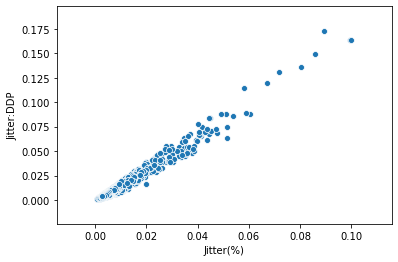

In [43]:
sns.scatterplot(data = data, x="Jitter(%)", y="Jitter:DDP")

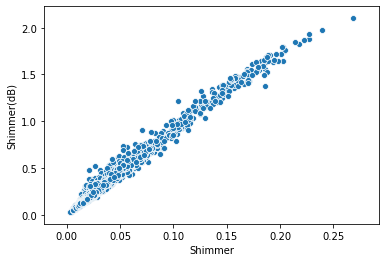

In [44]:
sns.scatterplot(data = data, x="Shimmer", y="Shimmer(dB)")

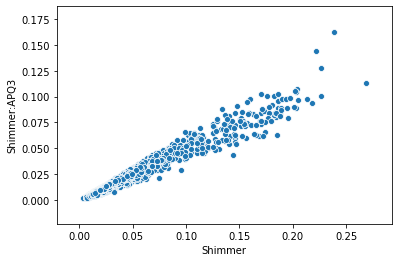

In [45]:
sns.scatterplot(data = data, x="Shimmer", y="Shimmer:APQ3")

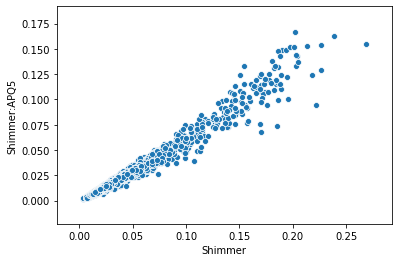

In [46]:
sns.scatterplot(data = data, x="Shimmer", y="Shimmer:APQ5")

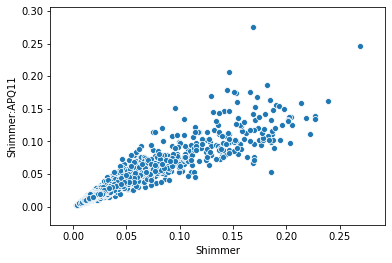

In [47]:
sns.scatterplot(data = data, x="Shimmer", y="Shimmer:APQ11")

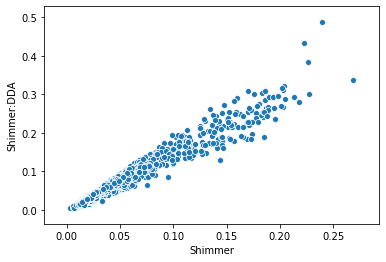

In [48]:
sns.scatterplot(data = data, x="Shimmer", y="Shimmer:DDA")

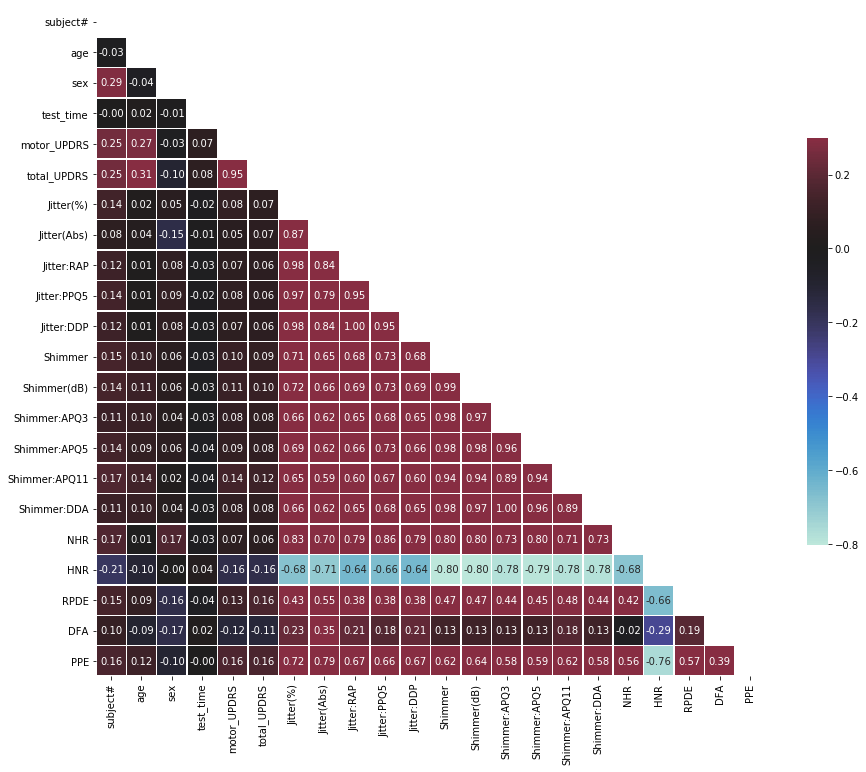

In [49]:
corr = data.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure()
fig.set_figheight(15) #Muda o tamanho do comprimento e largura.
fig.set_figwidth(15)

ax = sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, annot_kws={"size":10}, fmt='3.2f')

# **Considerações finais da Análise Explorátoria**

- Temos dados de 42 pessoas em estado inicial da doença de Parkinson. Estes dados se dividem em identificação pessoal(idade e sexo) e variáveis de gravação de voz feitas durante 6 meses.

- Temos diversos calculos de amplitude e frequência variando de ciclo a ciclo.

- O questíonario da parte de atividades diárias esta altamente ligado com a quantidade de pontos totais para o questionario de UPDRS.

- Todas as métricas de frequência tem uma boa relação com amplitude.
- O modelo ira ser baseado em cima da coluna 'total_UPDRS' pois se trata do questionário completo.

# **Modelagem do dataset**


In [50]:
data_set= data.drop('subject#', axis = 1)

- Retirando a coluna de chave primária.

# **Random forest**


In [51]:
#Importação dos modulos a serem utilizados pelo random forest

import random
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [52]:
labels = np.array(data_set['total_UPDRS'])

In [53]:
labels

array([34.398, 34.894, 35.389, ..., 32.495, 32.007, 31.513])

- Escolhendo variável que irei predizer.

In [54]:
features= data_set.drop('total_UPDRS', axis = 1)

In [55]:
features

,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,22.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,21.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,21.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,21.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


- Definindo a lista de variáveis que irei utilizar para construir a label.

In [56]:
feature_list = list(features.columns)

In [57]:
feature_list

['age',
 'sex',
 'test_time',
 'motor_UPDRS',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

- Lista das colunas.

In [58]:
features = np.array(features)

In [59]:
features

array([[7.2000e+01, 0.0000e+00, 5.6431e+00, ..., 4.1888e-01, 5.4842e-01,
        1.6006e-01],
       [7.2000e+01, 0.0000e+00, 1.2666e+01, ..., 4.3493e-01, 5.6477e-01,
        1.0810e-01],
       [7.2000e+01, 0.0000e+00, 1.9681e+01, ..., 4.6222e-01, 5.4405e-01,
        2.1014e-01],
       ...,
       [6.1000e+01, 0.0000e+00, 1.5682e+02, ..., 4.7792e-01, 5.7888e-01,
        1.4157e-01],
       [6.1000e+01, 0.0000e+00, 1.6373e+02, ..., 5.6865e-01, 5.6327e-01,
        1.4204e-01],
       [6.1000e+01, 0.0000e+00, 1.7073e+02, ..., 5.8608e-01, 5.7077e-01,
        1.5336e-01]])

- Transformando o dataset de freatures em uma coleção de listas(array).

In [60]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [61]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4406, 20)
Training Labels Shape: (4406,)
Testing Features Shape: (1469, 20)
Testing Labels Shape: (1469,)


- Definindo as labels de teste e treino, features de teste e treino e tamanho dos mesmos a partir de porcentagens do label e freature original.

In [62]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

-  Preparando para utilizar o randomforestregressor, calculando o número de arvores de decisão.

In [63]:
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [65]:
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [66]:
predictions = rf.predict(test_features)

In [67]:
predictions

array([43.5968502 , 12.026899  , 14.100518  , ..., 12.54081004,
       39.062828  , 13.6353403 ])

In [68]:
errors = abs(predictions - test_labels)

- Calculo do erro absoluto.

In [71]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.21 degrees.


In [72]:
mape = 100 * (errors / test_labels)

- Calculando o Erro percentual absoluto médio.

In [73]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.21 %.


In [74]:
clf = RandomForestRegressor()

In [75]:
model_rf = clf.fit(train_features,train_labels)

In [76]:
#Utilizando crossvalidation para verificar overfiting.

print(cross_val_score(model_rf,train_features, train_labels))

[0.99730435 0.99749626 0.9977743  0.99805938 0.99696743]


In [77]:
pred = model_rf.predict(train_features)

In [78]:
pred

array([23.30038, 54.64509, 53.91134, ..., 23.51827, 43.56433, 45.89434])

In [79]:
train_labels

array([23.308, 54.63 , 53.917, ..., 23.513, 43.563, 45.956])

- Abaixo temos tentativa de criar uma imagem da arvore de decisão.

rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

tree_small = rf_small.estimators_[5]

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

# **Considerações do RandomForest**

- Os valores preditos e originais tem valores muito semelhantes.

- Após resultado dos meus dados irei observar se existe overfiting dos meus modelos.

- Importante calcular o grau de importância de cada varíavel para meu modelo.

# **Linear**


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt

from sklearn.datasets import make_regression

- Existe uma repetição de pacotes e modulos sendo importados.

In [81]:
modelo = LinearRegression()

In [82]:
y = data_set['total_UPDRS'].values
X = data_set.drop('total_UPDRS',axis=1).values

In [83]:
y

array([34.398, 34.894, 35.389, ..., 32.495, 32.007, 31.513])

In [84]:
X

array([[7.2000e+01, 0.0000e+00, 5.6431e+00, ..., 4.1888e-01, 5.4842e-01,
        1.6006e-01],
       [7.2000e+01, 0.0000e+00, 1.2666e+01, ..., 4.3493e-01, 5.6477e-01,
        1.0810e-01],
       [7.2000e+01, 0.0000e+00, 1.9681e+01, ..., 4.6222e-01, 5.4405e-01,
        2.1014e-01],
       ...,
       [6.1000e+01, 0.0000e+00, 1.5682e+02, ..., 4.7792e-01, 5.7888e-01,
        1.4157e-01],
       [6.1000e+01, 0.0000e+00, 1.6373e+02, ..., 5.6865e-01, 5.6327e-01,
        1.4204e-01],
       [6.1000e+01, 0.0000e+00, 1.7073e+02, ..., 5.8608e-01, 5.7077e-01,
        1.5336e-01]])

- Definição e visualização das varíaveis X e Y.

In [85]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, shuffle = True,random_state=0)

In [86]:
modelo.fit(X_test_1,y_test_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
modelo.score(X_test_1,y_test_1)

0.9079272928220353

- Cálculo do R² do modelo. 

In [91]:
mean_absolute_error(Y_red,y_test_1)

2.358520012053385

- Cálculo do erro médio.

In [92]:
Y_red = modelo.predict(X_test_1)

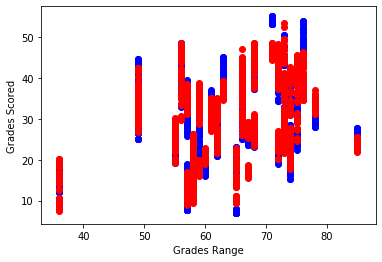

In [93]:
plt.scatter( X_test_1[:,0] , y_test_1, color='b')
plt.scatter( X_test_1[:,0] , Y_red, color='r')
plt.xlabel('Grades Range')
plt.ylabel('Grades Scored')
plt.show()

- Visualização grafíca dos pontos predítos e originais.

# **Lasso**


In [94]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt

In [95]:
y = data_set['total_UPDRS'].values
X = data_set.drop('total_UPDRS',axis=1).values

In [96]:
len(x)

5875

In [97]:
len(y)

5875

In [98]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, shuffle = True,random_state=0)

In [99]:
modelo1 = Lasso(alpha=0.0001, normalize=False)
modelo1.fit(X_test_2, y_test_2)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
len(X_test_2)

1763

In [101]:
len(X_train_2)

4112

In [102]:
score = modelo1.score(X_test_2, y_test_2)

In [103]:
score

0.907620530655848

In [104]:
Y_pred_2 = modelo1.predict(X_test_2)

In [108]:
len(Y_pred_2)

1763

In [109]:
len(y_train_2)

4112

In [111]:
mean_absolute_error(Y_pred_2,y_test_2)

2.364000077697803

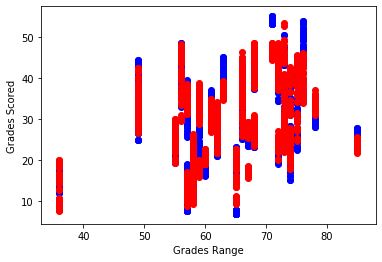

In [112]:
plt.scatter( X_test_2[:,0], y_test_2, color='b')
plt.scatter( X_test_2[:,0] , Y_pred_2, color='r')
plt.xlabel('Grades Range')
plt.ylabel('Grades Scored') 
plt.show()

# **Ridge**


In [113]:
y = data_set['total_UPDRS'].values
X = data_set.drop('total_UPDRS',axis=1).values

In [114]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.3, shuffle = True,random_state=0)

In [115]:
modelo2 = Ridge(alpha=0.000001)
modelo2.fit(X_test_3, y_test_3)

Ridge(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
score_2 = modelo2.score(X_test_3, y_test_3)

In [117]:
score_2

0.9078148893155258

In [118]:
modelo_final_2 = Ridge(alpha=0.0001)
modelo_final_2.fit(X_test_3, y_test_3)
Y_pred_3 = modelo_final_2.predict(X_test_3)

In [119]:
mean_absolute_error(Y_pred_3,y_test_3)

2.3639145764877556

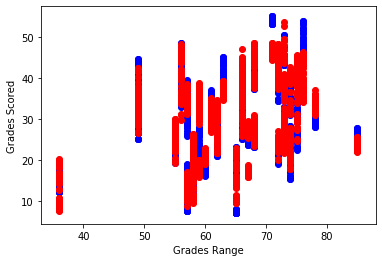

In [120]:
plt.scatter( X_test_3[:,0] , y_test_3, color='b')
plt.scatter( X_test_3[:,0] , Y_pred_3, color='r')
plt.xlabel('Grades Range')
plt.ylabel('Grades Scored')
plt.show()

# **Considerações finais da Modelagem**

- Primeiramente minha modelagem não foi adequada para este tipo de dataset pois, é um dataset de séries temporais e tratei como algo comum. Os pontos abaixo podem mudar se for utilizado a modelagem de forma correta.

- Meu modelo não esta sofrendo de overfiting, sendo a diferença de score de R² para os dados de teste e de treino esta sendo de, aproximadamente, 0,09.

- Todas minhas varíaveis respondem bem ao meu modelo.

- Seria necessário calcular a o quanto uma varíavel pesa no meu modelo através de alguns pacotes utilizados no randomforest.

- A voz é uma varíavel bem signifícativa para detectar o grau de Mal de Parkinson.